# **Question 13**

In [2]:
!pip install lightgbm

In [3]:
#imports required in this project
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import ndcg_score
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import ndcg_score
import pandas as pd
from google.colab import drive

In [4]:
#mounting the drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Load the dataset for one fold
def load_one_fold(data_path):
    X_train, y_train, qid_train = load_svmlight_file(str(data_path + 'train.txt'), query_id=True)
    X_test, y_test, qid_test = load_svmlight_file(str(data_path + 'test.txt'), query_id=True)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    _, group_train = np.unique(qid_train, return_counts=True)
    _, group_test = np.unique(qid_test, return_counts=True)
    return X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test

def ndcg_single_query(y_score, y_true, k):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

# calculate NDCG score given a trained model
def compute_ndcg_all(model, X_test, y_test, qids_test, k=10):
    unique_qids = np.unique(qids_test)
    ndcg_ = list()
    for i, qid in enumerate(unique_qids):
        y = y_test[qids_test == qid]

        if np.sum(y) == 0:
            continue

        p = model.predict(X_test[qids_test == qid])

        idcg = ndcg_single_query(y, y, k=k)
        ndcg_.append(ndcg_single_query(p, y, k=k) / idcg)
    return np.mean(ndcg_)

# get importance of features
def get_feature_importance(model, importance_type='gain'):
    return model.feature_importance(importance_type=importance_type)

In [6]:
#Giving the path to the wek10k folder
web10k_path='gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 3/MSLR-WEB10K'

In [7]:
#Loading all the data from the folders
X_train_fold1, y_train_fold1, qid_train_fold1, group_train_fold1, X_test_fold1, y_test_fold1, qid_test_fold1, group_test_fold1 = load_one_fold(web10k_path+'/Fold1/')
X_train_fold2, y_train_fold2, qid_train_fold2, group_train_fold2, X_test_fold2, y_test_fold2, qid_test_fold2, group_test_fold2 = load_one_fold(web10k_path+'/Fold2/')
X_train_fold3, y_train_fold3, qid_train_fold3, group_train_fold3, X_test_fold3, y_test_fold3, qid_test_fold3, group_test_fold3 = load_one_fold(web10k_path+'/Fold3/')
X_train_fold4, y_train_fold4, qid_train_fold4, group_train_fold4, X_test_fold4, y_test_fold4, qid_test_fold4, group_test_fold4 = load_one_fold(web10k_path+'/Fold4/')
X_train_fold5, y_train_fold5, qid_train_fold5, group_train_fold5, X_test_fold5, y_test_fold5, qid_test_fold5, group_test_fold5 = load_one_fold(web10k_path+'/Fold5/')

In [9]:
X_train_fold1

<723412x136 sparse matrix of type '<class 'numpy.float64'>'
	with 98384032 stored elements in Compressed Sparse Row format>

In [10]:
#Combining all the qid_train of all the folders
qid_train= np.concatenate((qid_train_fold1, qid_train_fold2, qid_train_fold3, qid_train_fold4, qid_train_fold5))
print(qid_train.shape)

(3600576,)


In [12]:
#Combining all the qid_test of all the folders
qid_test = np.concatenate((qid_test_fold1, qid_test_fold2, qid_test_fold3, qid_test_fold4, qid_test_fold5))
print(qid_test.shape)

(1200192,)


In [13]:
#Combining all the y_train of all the folders
y_train = np.concatenate((y_train_fold1, y_train_fold2, y_train_fold3, y_train_fold4, y_train_fold5))
print(y_train.shape)

(3600576,)


In [14]:
#Combining all the y_test of all the folders
y_test = np.concatenate((y_test_fold1, y_test_fold2, y_test_fold3, y_test_fold4, y_test_fold5))
print(y_test.shape)

(1200192,)


In [16]:
print(X_train_fold1.shape)

(723412, 136)


In [17]:
print(X_train_fold2.shape)

(716683, 136)


In [23]:
#Finding the number of unique queries in the training and testing set
unique_queries_train = len(np.unique(qid_train))
unique_queries_test = len(np.unique(qid_test))

print("The number of unique queries in training set is", unique_queries_train)
print("The number of unique queries in testing set is", unique_queries_test)

The number of unique queries in training set is 10000
The number of unique queries in testing set is 10000


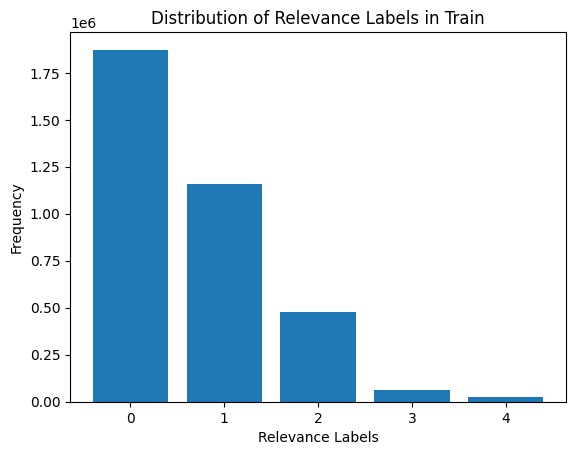

In [28]:
#Plotting a bar graph of the relevance labels and its frequency in the train data
unique_relevance_train, no_of_train = np.unique(y_train, return_counts=True)

plt.bar(unique_relevance_train, no_of_train)
plt.title("Distribution of Relevance Labels in Train")
plt.xlabel("Relevance Labels")
plt.ylabel("Frequency")
plt.show()

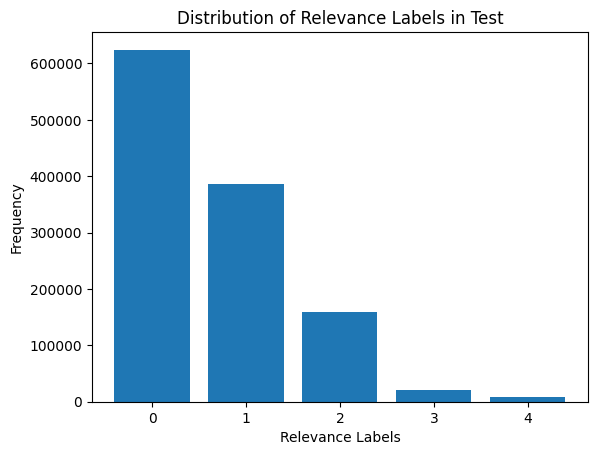

In [29]:
#Plotting a bar graph of the relevance labels and its frequency in the test data
unique_relevance_test, no_of_test = np.unique(y_test, return_counts=True)
plt.bar(unique_relevance_test, no_of_test)
plt.title("Distribution of Relevance Labels in Test")
plt.xlabel("Relevance Labels")
plt.ylabel("Frequency")
plt.show()

QUESTION 13:
Data Understanding and Preprocessing:
Use the provided helper code for loading and pre-processing Web10k data.
Print out the number of unique queries in total and show distribution of relevance labels.

>The number of unique queries in training set is 10000\
The number of unique queries in testing set is 10000\
Refer to the bar graphs above to see the distribution of relevance labels.


# **Question 14**

In [9]:
data=[
    (X_train_fold1, y_train_fold1, qid_train_fold1, group_train_fold1, X_test_fold1, y_test_fold1, qid_test_fold1, group_test_fold1),
    (X_train_fold2, y_train_fold2, qid_train_fold2, group_train_fold2, X_test_fold2, y_test_fold2, qid_test_fold2, group_test_fold2),
    (X_train_fold3, y_train_fold3, qid_train_fold3, group_train_fold3, X_test_fold3, y_test_fold3, qid_test_fold3, group_test_fold3),
    (X_train_fold4, y_train_fold4, qid_train_fold4, group_train_fold4, X_test_fold4, y_test_fold4, qid_test_fold4, group_test_fold4),
    (X_train_fold5, y_train_fold5, qid_train_fold5, group_train_fold5, X_test_fold5, y_test_fold5, qid_test_fold5, group_test_fold5)
]

In [11]:
# Define LightGBM parameters
params = {
    'objective': 'lambdarank',
    # Can add other parameters such as learning rate, max_depth, etc.
}

In [33]:
ndcg_values=[]

# Iterate over each fold
for fold, (X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test) in enumerate(data):

    # Create a LightGBM dataset for training
    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)

    # Train the LightGBM model
    gbm = lgb.train(params, train_data)

    # Evaluate the predictions using nDCG@3, nDCG@5, and nDCG@10
    ndcg_3 = compute_ndcg_all(gbm,X_test, y_test, qid_test, k=3)
    ndcg_5 = compute_ndcg_all(gbm,X_test, y_test, qid_test, k=5)
    ndcg_10 = compute_ndcg_all(gmb,X_test, y_test, qid_test, k=10)

    ndcg_values.append([ndcg_3, ndcg_5, ndcg_10])

    # Report the model's performance on the test set
    print(f"Fold {fold + 1}:")
    print(f"nDCG@3: {ndcg_3}")
    print(f"nDCG@5: {ndcg_5}")
    print(f"nDCG@10: {ndcg_10}")
    print("-----------------------------------------")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.552402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
Fold 1:
nDCG@3: 0.4564571300800643
nDCG@5: 0.4632890672260867
nDCG@10: 0.48286731451235976
-----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.511309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25623
[LightGBM] [Info] Number of data points in the train set: 716683, number of used features: 136
Fold 2:
nDCG@3: 0.4538895365009714
nDCG@5: 0.4573292117374164
nDCG@10: 0.4767546810011047
-----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0

In [34]:
#Printing the values for all the folders
for fold in range(5):
  print(f"Fold {fold + 1}:")
  print(f"nDCG@3: {ndcg_values[fold][0]}")
  print(f"nDCG@5: {ndcg_values[fold][1]}")
  print(f"nDCG@10: {ndcg_values[fold][2]}")
  print("-----------------------------------------")

Fold 1:
nDCG@3: 0.4564571300800643
nDCG@5: 0.4632890672260867
nDCG@10: 0.48286731451235976
-----------------------------------------
Fold 2:
nDCG@3: 0.4538895365009714
nDCG@5: 0.4573292117374164
nDCG@10: 0.4767546810011047
-----------------------------------------
Fold 3:
nDCG@3: 0.4490681494620125
nDCG@5: 0.4583480538865081
nDCG@10: 0.47589507831078093
-----------------------------------------
Fold 4:
nDCG@3: 0.461178820507814
nDCG@5: 0.4663860127875315
nDCG@10: 0.487724614983737
-----------------------------------------
Fold 5:
nDCG@3: 0.46963442883961365
nDCG@5: 0.4714315145908388
nDCG@10: 0.49035928048966515
-----------------------------------------


QUESTION 14:
LightGBM Model Training:
For each of the five provided folds, train a LightGBM model using the ’lambdarank’ objective. After training, evaluate and report the model’s performance on the test set using nDCG@3, nDCG@5 and nDCG@10.

>Fold 1:\
nDCG@3: 0.4564571300800643\
nDCG@5: 0.4632890672260867\
nDCG@10: 0.48286731451235976

>Fold 2:\
nDCG@3: 0.4538895365009714\
nDCG@5: 0.4573292117374164\
nDCG@10: 0.4767546810011047

>Fold 3:\
nDCG@3: 0.4490681494620125\
nDCG@5: 0.4583480538865081\
nDCG@10: 0.47589507831078093

>Fold 4:\
nDCG@3: 0.461178820507814\
nDCG@5: 0.4663860127875315\
nDCG@10: 0.487724614983737

>Fold 5:\
nDCG@3: 0.46963442883961365\
nDCG@5: 0.4714315145908388\
nDCG@10: 0.49035928048966515


# **Question 15**

In [42]:
#CHANGED HELPED CODE REMOVED booster_ ------- CHECK????
top_5_features=[]
# Iterate over each fold
for fold, (X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test) in enumerate(data):

    # Create a LightGBM dataset for training
    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)

    # Train the LightGBM model
    gbm = lgb.train(params, train_data)
    # Get feature importance scores
    importance_scores = get_feature_importance(gbm, importance_type='gain')

    # Create a list of feature names
    feature_names = gbm.feature_name()

    # Create a dictionary mapping feature names to importance scores
    feature_importance_dict = dict(zip(feature_names, importance_scores))

    # Sort the feature importance dictionary by importance score in descending order
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Print the top 5 most important features for the current fold
    print(f"Fold {fold + 1}:")
    features=[]
    for feature, score in sorted_feature_importance[:5]:
        print(f"{feature}: {score}")
        features.append((feature,score))
    top_5_features.append(features)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.442188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
Fold 1:
Column_133: 23856.702950954437
Column_7: 4248.546391487122
Column_107: 4135.244449853897
Column_54: 4078.463216304779
Column_129: 3635.03702378273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.525960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25623
[LightGBM] [Info] Number of data points in the train set: 716683, number of used features: 136
Fold 2:
Column_133: 23578.90825009346
Column_7: 5157.964912414551
Column_54: 4386.669756650925
Column_107: 4094.0121722221375
Column_

In [43]:
#Printing the top 5 features and their respective scores for all the 5 folders
for fold in range(5):
  print(f"Fold {fold + 1} - Top 5 features :")
  print(top_5_features[fold])
  print("-----------------------------------------")

Fold 1 - Top 5 features :
[('Column_133', 23856.702950954437), ('Column_7', 4248.546391487122), ('Column_107', 4135.244449853897), ('Column_54', 4078.463216304779), ('Column_129', 3635.03702378273)]
-----------------------------------------
Fold 2 - Top 5 features :
[('Column_133', 23578.90825009346), ('Column_7', 5157.964912414551), ('Column_54', 4386.669756650925), ('Column_107', 4094.0121722221375), ('Column_129', 4035.0706725120544)]
-----------------------------------------
Fold 3 - Top 5 features :
[('Column_133', 23218.075441122055), ('Column_54', 4991.3033719062805), ('Column_107', 4226.807395458221), ('Column_129', 4059.7525141239166), ('Column_7', 3691.792320251465)]
-----------------------------------------
Fold 4 - Top 5 features :
[('Column_133', 23796.899673223495), ('Column_7', 4622.622978448868), ('Column_54', 3883.4817056655884), ('Column_129', 3356.8469800949097), ('Column_128', 3207.5755367279053)]
-----------------------------------------
Fold 5 - Top 5 features :
[

QUESTION 15:
Result Analysis and Interpretation:
For each of the five provided folds, list top 5 most important features of the model based on the importance score. Please use model.booster .feature importance(importance type=’gain’) as demonstrated here for retrieving importance score per feature. You can also find helper code in the provided notebook.

> Below are the top 5 features and their respective scores:

>Fold 1 - Top 5 features :\
[('Column_133', 23856.702950954437),\
('Column_7', 4248.546391487122),\
('Column_107', 4135.244449853897),\
('Column_54', 4078.463216304779),\
('Column_129', 3635.03702378273)]

>Fold 2 - Top 5 features :\
[('Column_133', 23578.90825009346),\
('Column_7', 5157.964912414551),\
('Column_54', 4386.669756650925),\
('Column_107', 4094.0121722221375),\
('Column_129', 4035.0706725120544)]

>Fold 3 - Top 5 features :\
[('Column_133', 23218.075441122055),\
('Column_54', 4991.3033719062805),\
('Column_107', 4226.807395458221),\
('Column_129', 4059.7525141239166),\
('Column_7', 3691.792320251465)]

>Fold 4 - Top 5 features :\
[('Column_133', 23796.899673223495),\
('Column_7', 4622.622978448868),\
('Column_54', 3883.4817056655884),\
('Column_129', 3356.8469800949097),\
('Column_128', 3207.5755367279053)]

>Fold 5 - Top 5 features :\
[('Column_133', 23540.94235444069),\
('Column_7', 4794.9451723098755),\
('Column_54', 4079.608554124832),\
('Column_107', 3514.8357515335083),\
('Column_129', 3209.0584440231323)]


# **Question 16**

In [13]:
#Removing the top 20 features and then finding the ndcg values for the reduced dataset
ndcg_values = []
# Iterate over each fold
for fold, (X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test) in enumerate(data):

    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)
    gbm = lgb.train(params, train_data)
    importance_scores = gbm.feature_importance(importance_type='gain')

    # Extract the top 20 most important features
    top_20_features = np.argsort(importance_scores)[-20:][::-1]

    remaining_feature_indices = sorted(set(range(X_train.shape[1])) - set(top_20_features))
    X_train_reduced = X_train[:, remaining_feature_indices]
    X_test_reduced = X_test[:, remaining_feature_indices]

    # Remove the top 20 most important features from the dataset

    train_data_reduced = lgb.Dataset(X_train_reduced, label=y_train, group=group_train)
    gbm_reduced = lgb.train(params, train_data_reduced)

    # Evaluate the performance of the new model on the test set using nDCG
    ndcg_3 = compute_ndcg_all(gbm_reduced,X_test_reduced, y_test, qid_test, k=3)
    ndcg_5 = compute_ndcg_all(gbm_reduced,X_test_reduced, y_test, qid_test, k=5)
    ndcg_10 = compute_ndcg_all(gbm_reduced,X_test_reduced, y_test, qid_test, k=10)

    ndcg_values.append([ndcg_3, ndcg_5, ndcg_10])

    # Report the model's performance on the test set
    print(f"Fold {fold + 1}:")
    print(f"nDCG@3: {ndcg_3}")
    print(f"nDCG@5: {ndcg_5}")
    print(f"nDCG@10: {ndcg_10}")
    print("-----------------------------------------")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.573596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.519905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21582
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 116
Fold 1:
nDCG@3: 0.37967488460229254
nDCG@5: 0.3850299691938894
nDCG@10: 0.4083636029390886
-----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.776973 seconds.
You can set `force_row_wise=true` to remove the ove

In [14]:
#Printing the values after removing the top 20 features and then finding the ndcg values for the reduced dataset
for fold in range(5):
  print(f"Fold {fold + 1}:")
  print(f"nDCG@3: {ndcg_values[fold][0]}")
  print(f"nDCG@5: {ndcg_values[fold][1]}")
  print(f"nDCG@10: {ndcg_values[fold][2]}")
  print("-----------------------------------------")

Fold 1:
nDCG@3: 0.37967488460229254
nDCG@5: 0.3850299691938894
nDCG@10: 0.4083636029390886
-----------------------------------------
Fold 2:
nDCG@3: 0.3739449461043477
nDCG@5: 0.3819536013454118
nDCG@10: 0.4045026694861529
-----------------------------------------
Fold 3:
nDCG@3: 0.3823833692306899
nDCG@5: 0.3899961152757789
nDCG@10: 0.4116363812695088
-----------------------------------------
Fold 4:
nDCG@3: 0.381976845689231
nDCG@5: 0.39281004672399866
nDCG@10: 0.4121071637228934
-----------------------------------------
Fold 5:
nDCG@3: 0.38428336621785103
nDCG@5: 0.39216767580543455
nDCG@10: 0.4166871494621703
-----------------------------------------


In [16]:
#Removing the bottom 60 features and then finding the ndcg values for the reduced dataset
ndcg_values = []
# Iterate over each fold
for fold, (X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test) in enumerate(data):

    train_data = lgb.Dataset(X_train, label=y_train, group=group_train)
    gbm = lgb.train(params, train_data)
    importance_scores = gbm.feature_importance(importance_type='gain')

    bottom_60_features = np.argsort(importance_scores)[:60]

    remaining_feature_indices = sorted(set(range(X_train.shape[1])) - set(bottom_60_features))
    X_train_reduced = X_train[:, remaining_feature_indices]
    X_test_reduced = X_test[:, remaining_feature_indices]

   # Remove the bottom 60 features

    train_data_reduced = lgb.Dataset(X_train_reduced, label=y_train, group=group_train)
    gbm_reduced = lgb.train(params, train_data_reduced)

    # Evaluate the performance of the new model on the test set using nDCG
    ndcg_3 = compute_ndcg_all(gbm_reduced,X_test_reduced, y_test, qid_test, k=3)
    ndcg_5 = compute_ndcg_all(gbm_reduced,X_test_reduced, y_test, qid_test, k=5)
    ndcg_10 = compute_ndcg_all(gbm_reduced,X_test_reduced, y_test, qid_test, k=10)

    ndcg_values.append([ndcg_3, ndcg_5, ndcg_10])

    # Report the model's performance on the test set
    print(f"Fold {fold + 1}:")
    print(f"nDCG@3: {ndcg_3}")
    print(f"nDCG@5: {ndcg_5}")
    print(f"nDCG@10: {ndcg_10}")
    print("-----------------------------------------")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.455896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16271
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 76
Fold 1:
nDCG@3: 0.4542530326427776
nDCG@5: 0.46265744453383695
nDCG@10: 0.4819713060930259
-----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.975597 seconds.
You can set `force_row_wise=true` to remove the over

In [17]:
#Printing the values after removing the bottom 60 features and then finding the ndcg values for the reduced dataset
for fold in range(5):
  print(f"Fold {fold + 1}:")
  print(f"nDCG@3: {ndcg_values[fold][0]}")
  print(f"nDCG@5: {ndcg_values[fold][1]}")
  print(f"nDCG@10: {ndcg_values[fold][2]}")
  print("-----------------------------------------")

Fold 1:
nDCG@3: 0.4542530326427776
nDCG@5: 0.46265744453383695
nDCG@10: 0.4819713060930259
-----------------------------------------
Fold 2:
nDCG@3: 0.457290225801309
nDCG@5: 0.4602669061430629
nDCG@10: 0.4772534003341443
-----------------------------------------
Fold 3:
nDCG@3: 0.4497901754692966
nDCG@5: 0.4586395637756899
nDCG@10: 0.4774361560299901
-----------------------------------------
Fold 4:
nDCG@3: 0.46063528567047524
nDCG@5: 0.46734032124732483
nDCG@10: 0.48888147783549574
-----------------------------------------
Fold 5:
nDCG@3: 0.470186124814149
nDCG@5: 0.4733522942533459
nDCG@10: 0.4908165844880891
-----------------------------------------


QUESTION 16:

Experiments with Subset of Features:
For each of the five provided folds:

Remove the top 20 most important features according to the computed importance score in the question 15. Then train a new LightGBM model on the resulted 116 dimensional query- url data. Evaluate the performance of this new model on the test set using nDCG. Does the outcome align with your expectations? If not, please share your hypothesis regarding the potential reasons for this discrepancy.

>Fold 1:\
nDCG@3: 0.37967488460229254\
nDCG@5: 0.3850299691938894\
nDCG@10: 0.4083636029390886

>Fold 2:\
nDCG@3: 0.3739449461043477\
nDCG@5: 0.3819536013454118\
nDCG@10: 0.4045026694861529

>Fold 3:\
nDCG@3: 0.3823833692306899\
nDCG@5: 0.3899961152757789\
nDCG@10: 0.4116363812695088

>Fold 4:\
nDCG@3: 0.381976845689231\
nDCG@5: 0.39281004672399866\
nDCG@10: 0.4121071637228934

>Fold 5:\
nDCG@3: 0.38428336621785103\
nDCG@5: 0.39216767580543455\
nDCG@10: 0.4166871494621703

> Yes the output aligns with the expected output. If we remove the top 20 features, we expect the performance to drop. This is why we observe that for each folder, the performance decreases drastically since we removed the important features.

Remove the 60 least important features according to the computed importance score in the question 15. Then train a new LightGBM model on the resulted 76 dimensional query-url data. Evaluate the performance of this new model on the test set using nDCG. Does the outcome align with your expectations? If not, please share your hypothesis regarding the potential reasons for this discrepancy.

>Fold 1:\
nDCG@3: 0.4542530326427776\
nDCG@5: 0.46265744453383695\
nDCG@10: 0.4819713060930259

>Fold 2:\
nDCG@3: 0.457290225801309\
nDCG@5: 0.4602669061430629\
nDCG@10: 0.4772534003341443

>Fold 3:\
nDCG@3: 0.4497901754692966\
nDCG@5: 0.4586395637756899\
nDCG@10: 0.4774361560299901

>Fold 4:\
nDCG@3: 0.46063528567047524\
nDCG@5: 0.46734032124732483\
nDCG@10: 0.48888147783549574

>Fold 5:\
nDCG@3: 0.470186124814149\
nDCG@5: 0.4733522942533459\
nDCG@10: 0.4908165844880891


> Yes the output aligns with the expected output. If we remove the bottom 60 features, we expect the performance to not drop drastically. This is because these features do not contribute majorly to the performance. This is why we observe that for each folder, the performance does not decrease much since we removed the least important features.